# Color-coded Velocity

## July 10

In [2]:
import pandas as pd
import sys
import numpy as np
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook
from spectral_cube import SpectralCube
import pylab as pl

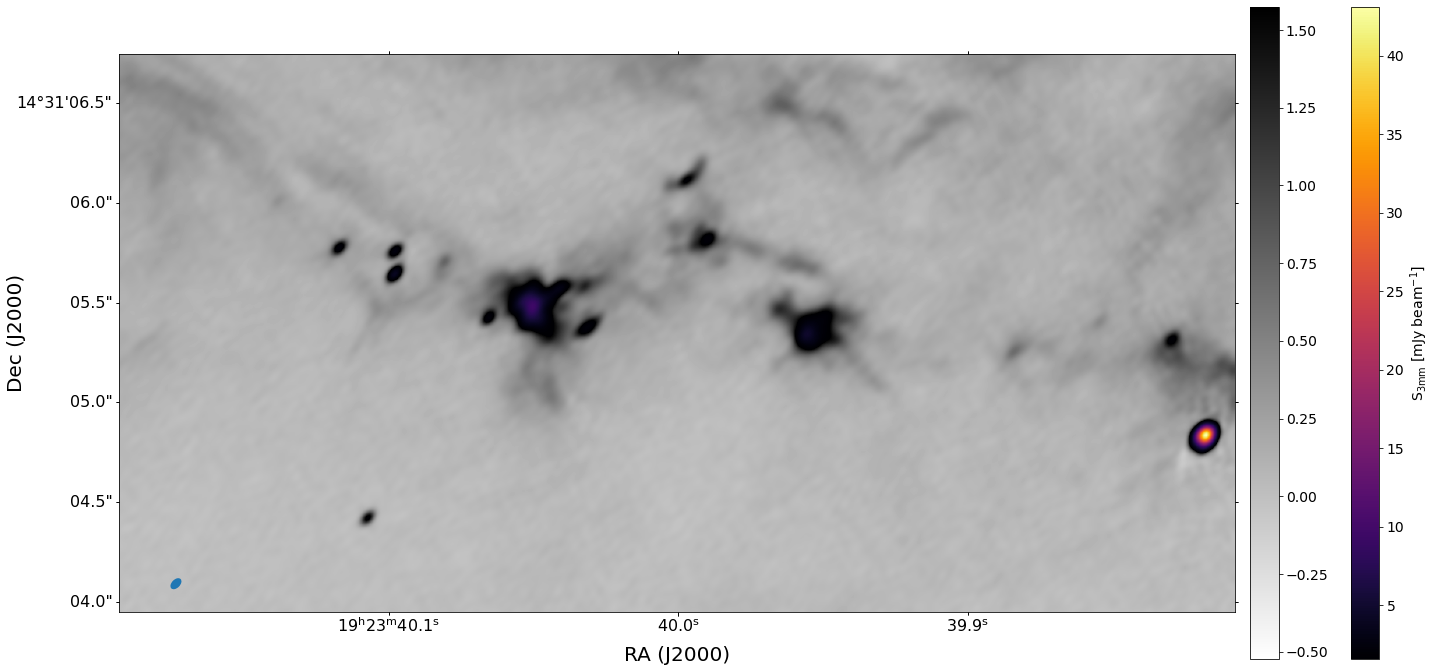

In [7]:
fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
img = SpectralCube.read(fn, format='casa_image')
cen = img.shape[1]/2, img.shape[2]/2

data = img[:,cen[0]-150:cen[0]+250, cen[1]-400:cen[1]+400]
fig = pl.figure(figsize=(20,12))
fig, ax = quicklook(data, fig=fig, inner_stretch='linear')



In [3]:
import pandas as pd
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

from quicklook_multicolorbar import quicklook

In [4]:
fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
fh = SpectralCube.read(fn, format='casa_image')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)

In [6]:
def w51north_plot():

    fig = pl.figure(figsize=(6,6))
    ax = pl.subplot(projection=ww)
    im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
#     cb = pl.colorbar(mappable=im)
#     cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]")
#     cb.set_ticks([np.nanmin(fh[0].data), -0.005, 0.00 ,0.005, 0.01, 0.015, 0.020, 0.025])
#     ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra1 = ax.coords['ra']
    ra1.set_major_formatter('hh:mm:ss.s')
    dec1 = ax.coords['dec']
    ra1.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec1.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra1.ticklabels.set_fontsize(tick_fontsize)
    ra1.set_ticklabel(exclude_overlapping=True)
    dec1.ticklabels.set_fontsize(tick_fontsize)
    dec1.set_ticklabel(exclude_overlapping=True)
    
    return ax

In [12]:
def maser_points_ax():
    
    im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
    df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  
    sc = ax.scatter(df.dec, df.ra, s=70, c=df.vlsr_kms, cmap='jet',facecolors="None", edgecolors='black', transform=ax.get_transform('world'))
    sc = sc.set_facecolor("none")
    cb = pl.colorbar(mappable=sc) 
    cb.set_label(f"$V_\\[LSR]$(km s-1)", fontsize = 16)

    return ax

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

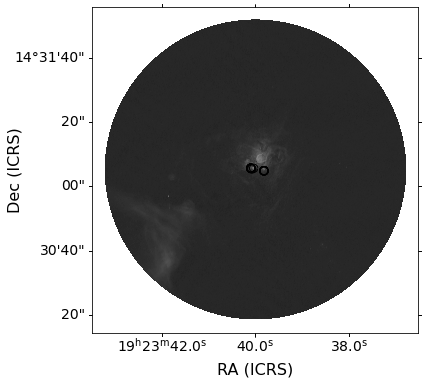

In [13]:
cen = fh.shape[1]/2, fh.shape[2]/2

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  

ax = w51north_plot()


maser_points_ax()
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
pl.tight_layout()

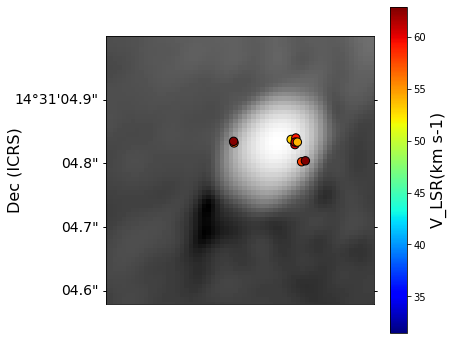

In [28]:
cen = fh.shape[1]/2, fh.shape[2]/2

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  

ax = w51north_plot()


maser_points_ax()
ax.axis([cen[0]+340,cen[0]+400,cen[1]-60,cen[1]-0])
pl.tight_layout()

In [30]:
def maser_points_ax():
    
    im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
    df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  
    sc = ax.scatter(df.dec, df.ra, s=70, c=df.S, cmap='spring',facecolors="None", edgecolors='black', transform=ax.get_transform('world'))
    cb = pl.colorbar(mappable=sc) 
    cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)

    return ax

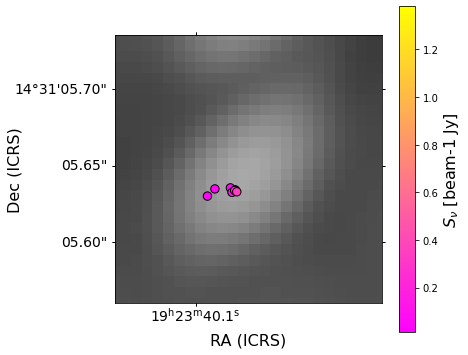

In [31]:
cen = fh.shape[1]/2, fh.shape[2]/2

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  

ax = w51north_plot()


maser_points_ax()
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
pl.tight_layout()

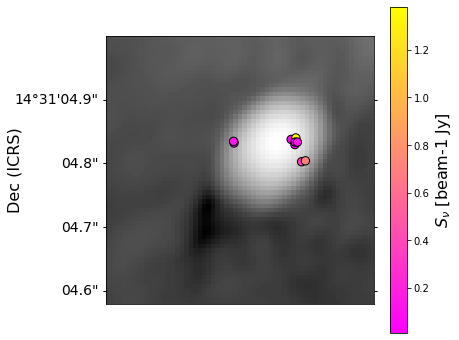

In [32]:

cen = fh.shape[1]/2, fh.shape[2]/2

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  

ax = w51north_plot()


maser_points_ax()
ax.axis([cen[0]+340,cen[0]+400,cen[1]-60,cen[1]-0])
pl.tight_layout()

In [ ]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

from quicklook_multicolorbar import quicklook

fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
fh = SpectralCube.read(fn, format='casa_image')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)
    
def w51north_plot():

    fig = pl.figure(figsize=(20,12))
    ax = pl.subplot(projection=ww)
    im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
    cb = pl.colorbar(mappable=im)
    cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]")
    cb.set_ticks([np.nanmin(fh[0].data), -0.005, 0.00 ,0.005, 0.01, 0.015, 0.020, 0.025])
    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  
cen = fh.shape[1]/2, fh.shape[2]/2
fig = pl.figure(figsize=(9,9))

ax = w51north_plot()
ax.plot(df.ra, df.dec)

In [ ]:
df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  

fig = pl.figure(figsize=(20,12))
ax = pl.subplot(projection=ww)

#pl.scatter(df.ra, df.dec, s=5, c=df.vlsr_kms, cmap='jet', transform=ax.get_transform('world'))
pl.scatter(df.dec, df.ra, c=df.vlsr_kms, s=df.S*500, cmap='jet', markerfacecolor="none", transform=ax.get_transform('world'))
pl.colorbar()

In [ ]:
def maser_points_ax():
    
    im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
    df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  
    sc = ax.scatter(df.dec, df.ra, c=df.vlsr_kms, s=df.S*500, cmap='jet', markerfacecolor="none", transform=ax.get_transform('world'))
    cb = pl.colorbar(mappable=sc) 
    cb.set_label(f"$\\nu_VLSR$ [km s-1]", fontsize = 16)

    return ax

In [ ]:
cen = fh.shape[1]/2, fh.shape[2]/2

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')  

ax = w51north_plot()


maser_points_ax()
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
pl.tight_layout()

In [48]:
def image_maser():
    im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
    return ax

In [14]:
def w51north_settings():

    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

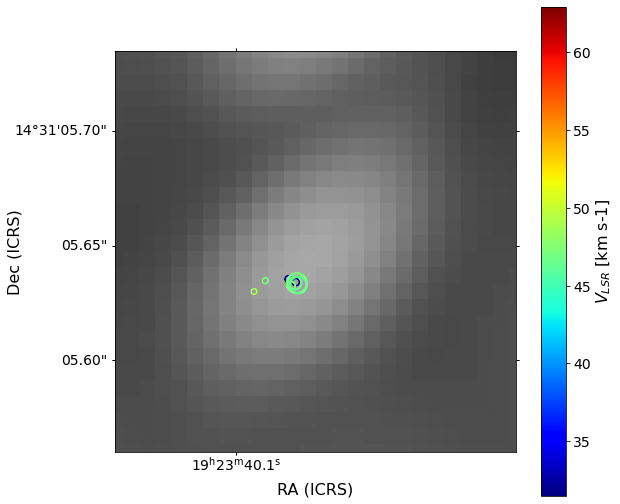

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2*np.pi,20)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(9,9))

ax = pl.subplot(projection=ww)

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')

im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
sc = ax.scatter(df.dec, df.ra, c=df.vlsr_kms, s=df.S*1000, cmap='jet',marker="$\u25EF$", transform=ax.get_transform('world'))

w51north_settings()

cb = plt.colorbar(mappable=sc)
cb.set_label("$V_{LSR}$ [km s-1]", fontsize = 16)


ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
cb.ax.tick_params(labelsize=14)
plt.show()



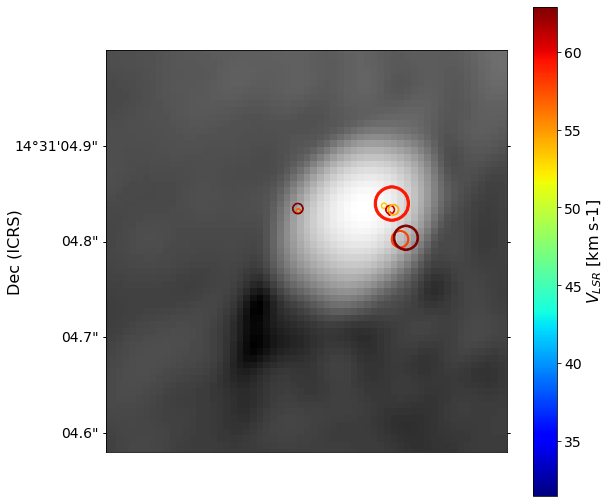

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2*np.pi,20)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(9,9))

ax = pl.subplot(projection=ww)

df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia.csv')

im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
sc = ax.scatter(df.dec, df.ra, c=df.vlsr_kms, s=df.S*1000, cmap='jet',marker="$\u25EF$", transform=ax.get_transform('world'))

w51north_settings()

cb = plt.colorbar(mappable=sc)
cb.set_label("$V_{LSR}$ [km s-1]", fontsize = 16)

ax.axis([cen[0]+340,cen[0]+400,cen[1]-60,cen[1]-0])

cb.ax.tick_params(labelsize=14)
plt.show()